## Análise de Dados - Casos de Dengue no Brasil de Dezembro de 2023 à Janeiro de 2024

### Contexto da Análise:
Neste ano, o Brasil enfrenta uma alarmante onda de casos de dengue, com números que superam significativamente os registros de anos anteriores. Esta situação preocupante serve como um chamado urgente para a análise e compreensão mais profundas sobre como a dengue está afetando diferentes partes do país, independente do nível de desenvolvimento humano de cada região.

Motivado por esta crescente epidemia, decidi analisar os dados disponíveis para identificar padrões, desafios e potenciais áreas de foco para intervenções de saúde pública. Meu objetivo não era apenas entender o problema, mas também investigar a relação entre a incidência de dengue e o Índice de Desenvolvimento Humano Municipal (IDHM) nos municípios mais afetados.

A escolha de focar nos 20 municípios com maior número de casos registrados este ano visa ilustrar a diversidade geográfica e socioeconômica do impacto da dengue, oferecendo ideias sobre a complexidade de combater essa doença em um país com as dimensões e a diversidade do Brasil. Esta análise busca verificar como diferentes municípios estão lidando com o surto e quais fatores podem estar contribuindo para a rápida propagação da doença, pavimentando o caminho para estratégias mais eficazes e direcionadas no combate à dengue.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

dados = pd.read_excel('casosdengue.xlsx')

In [2]:
dados.head(5)

,ID NOTIF,SEXO,IDADE,DATA,REGIÃO,UF,ESTADO,MUNICÍPIO
0,1,M,12.0,2024-01-04,NORTE,AC,ACRE,CRUZEIRO DO SUL
1,2,M,78.0,2024-01-13,NORTE,AC,ACRE,RIO BRANCO
2,3,F,41.0,2024-01-08,NORTE,AC,ACRE,BRASILEIA
3,4,F,24.0,2024-01-10,NORTE,AC,ACRE,BRASILEIA
4,5,F,53.0,2024-01-08,NORTE,AC,ACRE,RIO BRANCO


In [3]:
#Excluindo a coluna ID NOTIF
dados.drop(['ID NOTIF'], axis=1, inplace=True)

In [4]:
dados.head(5)

,SEXO,IDADE,DATA,REGIÃO,UF,ESTADO,MUNICÍPIO
0,M,12.0,2024-01-04,NORTE,AC,ACRE,CRUZEIRO DO SUL
1,M,78.0,2024-01-13,NORTE,AC,ACRE,RIO BRANCO
2,F,41.0,2024-01-08,NORTE,AC,ACRE,BRASILEIA
3,F,24.0,2024-01-10,NORTE,AC,ACRE,BRASILEIA
4,F,53.0,2024-01-08,NORTE,AC,ACRE,RIO BRANCO


### 1. Distribuição de Casos por Sexo
Durante os meses de dezembro de 2023 e janeiro de 2024, a distribuição dos casos de dengue por sexo revelou uma leve disparidade. Este padrão sugere que nos meses. Tal diferença pode estar relacionada a fatores como exposição ao vetor em atividades externas ou diferenças na procura por diagnóstico e tratamento entre os sexos.

In [5]:
filtro = (dados['DATA'] >= '2023-12-01') & (dados['DATA'] <= '2024-01-31')
dados_filtrado = dados[filtro]

# Contar casos por sexo
casos_por_sexo = dados_filtrado['SEXO'].value_counts()

# Verificar qual sexo tem mais casos
mais_afetado = casos_por_sexo.idxmax()
numero_de_casos = casos_por_sexo.max()

print(f"O sexo Feminino foi o mais afetado com {numero_de_casos} casos de dengue.")

O sexo Feminino foi o mais afetado com 129319 casos de dengue.


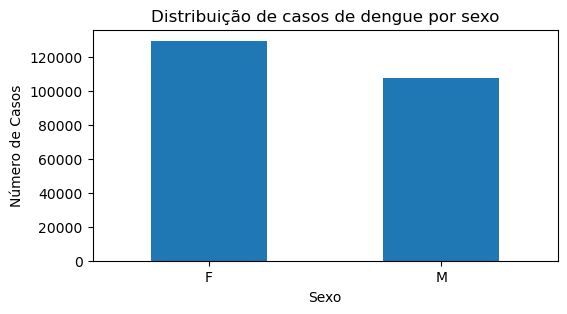

In [6]:
dados_filtrados = dados[dados['SEXO'].isin(['F', 'M'])]

plt.figure(figsize=(6, 3))

# Plotando distribuição de casos por sexo após o filtro
dados_filtrados['SEXO'].value_counts().plot(kind='bar')
plt.title('Distribuição de casos de dengue por sexo')
plt.xlabel('Sexo')
plt.ylabel('Número de Casos')
plt.xticks(rotation=0)
plt.show()

### 2. Análise da Idade dos Pacientes
A análise de idade dos pacientes com dengue nesse período mostra uma concentração significativa de casos em mulheres. Esse padrão indica uma possível vulnerabilidade ou maior exposição deste grupo etário ao vetor da dengue. A compreensão dessa distribuição é vital para direcionar campanhas de prevenção e conscientização.

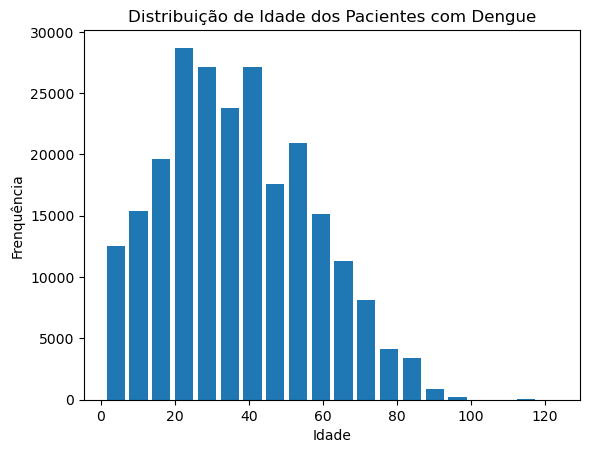

In [7]:
# Plotando distribuição de casos por idade
dados['IDADE'].plot(kind='hist', bins=20, rwidth=0.8)
plt.title('Distribuição de Idade dos Pacientes com Dengue')
plt.xlabel('Idade')
plt.ylabel('Frenquência')
plt.show()

In [8]:
# Calcula média e mediana da idade
media_idade = dados_filtrado['IDADE'].mean()
mediana_idade = dados_filtrado['IDADE'].median()

print(f"A idade média dos pacientes com dengue é de {media_idade:.2f} anos")

A idade média dos pacientes com dengue é de 37.15 anos


### 3. Casos de Dengue ao Longo do Tempo
Observando os casos de dengue ao longo do tempo, com foco em dezembro de 2023 e janeiro de 2024. Esse período pode coincidir com condições climáticas favoráveis à proliferação do Aedes aegypti, como densidade demográfica elevada e clima regional com muitas chuvas no período do verão.

In [9]:
# Agrupando casos por data
casos_por_data = dados_filtrado.groupby('DATA')['UF'].count()

# Identifica se houve aumento ou diminuição
tendencia = "aumento" if casos_por_data.iloc[-1] > casos_por_data.iloc[0] else "diminuição"

print(f"Houve um {tendencia} no número de casos significativos de dengue de dezembro de 2023 a janeiro de 2024.")

Houve um aumento no número de casos significativos de dengue de dezembro de 2023 a janeiro de 2024.


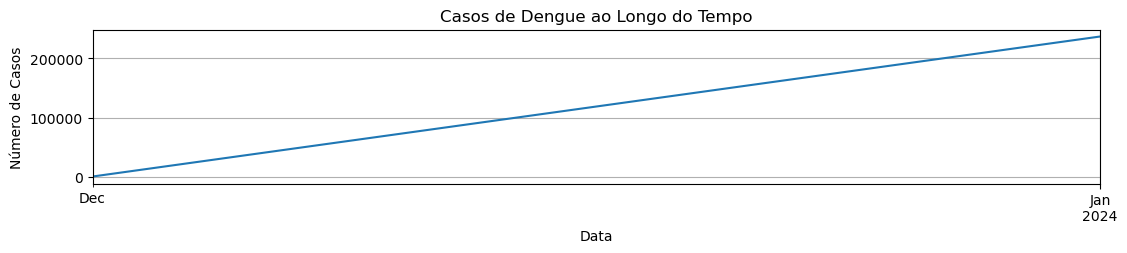

In [10]:
plt.figure(figsize=(13,2))

#Agrupando por data e contar os casos
casos_por_data = dados.resample('M', on='DATA')['UF'].count()

#Plotando casos ao longo do tempo
casos_por_data.plot()
plt.title('Casos de Dengue ao Longo do Tempo')
plt.xlabel('Data')
plt.ylabel('Número de Casos')
plt.grid(True)
plt.show()

### 4. Casos de Dengue por Região
A distribuição dos casos por região mostra que o Sudeste  foi a mais afetada. Esse fato pode estar associado a fatores regionais específicos, como descarte inadequado de resíduos, criando locais propícios para reprodução do mosquito da dengue, densidade demográfica elevada e clima regional com muitas chuvas no período do verão. A identificação dessas áreas permite um direcionamento mais eficaz de recursos e esforços de controle.

In [11]:
# Contagem de casos por região
casos_por_regiao = dados_filtrado['REGIÃO'].value_counts()

# Região com mais casos
regiao_mais_afetada = casos_por_regiao.idxmax()
casos_regiao_mais_afetada = casos_por_regiao.max()

print(f"A região mais afetada foi a Sudeste com {casos_regiao_mais_afetada} casos.")

A região mais afetada foi a Sudeste com 135816 casos.


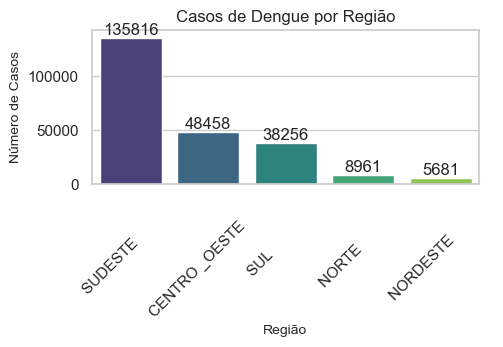

In [12]:
#Casos de dengue por região
casos_por_regiao = dados['REGIÃO'].value_counts()

sns.set(style='whitegrid')
plt.figure(figsize=(5,2))

sns.barplot(x=casos_por_regiao.index, y=casos_por_regiao.values, palette="viridis")

plt.title('Casos de Dengue por Região', fontsize=12)
plt.xlabel('Região', fontsize=10)
plt.ylabel('Número de Casos', fontsize=10)
plt.xticks(rotation=45)

#Anota o número de casos em cada barra
for index, value in enumerate(casos_por_regiao.values):
    plt.text(index, value, f'{value}', ha='center', va='bottom')

plt.show()

### 5. Análise de Casos por Município
Nos municípios, a análise destaca que Brasilia, Belo Horizonte, Rio de Janeiro e São Paulo como os locais com maior incidência de dengue. Este panorama sublinha a importância de ações localizadas de combate à dengue, adaptadas às características e necessidades específicas dessas comunidades. Ações como eliminação de criadouros do mosquito e campanhas educativas são fundamentais nessas áreas.

In [13]:
# Top 20 municípios com mais casos
top_municipios = dados_filtrado['MUNICÍPIO'].value_counts().head(20)

print("Top 20 municípios com mais casos de dengue de dezembro de 2023 a janeiro de 2024:")
for municipio, casos in top_municipios.items():
    print(f"{municipio}: {casos} casos")

Top 20 municípios com mais casos de dengue de dezembro de 2023 a janeiro de 2024:
BRASILIA                                    : 31728 casos
BELO HORIZONTE                              : 9104 casos
RIO DE JANEIRO                              : 8149 casos
SAO PAULO                                   : 4475 casos
ITABIRA                                     : 3663 casos
APUCARANA                                   : 3315 casos
RIBEIRAO PRETO                              : 3040 casos
SAO JOSE DOS CAMPOS                         : 2919 casos
LONDRINA                                    : 2904 casos
BETIM                                       : 2529 casos
MANAUS                                      : 2489 casos
CAMPINAS                                    : 2156 casos
JOINVILLE                                   : 2106 casos
VESPASIANO                                  : 1997 casos
CONTAGEM                                    : 1632 casos
GOIANIA                                     : 1550 casos
ANAPO

In [14]:
casos_por_municipio = dados.groupby('MUNICÍPIO')['UF'].count().sort_values(ascending=False)

top_n = 20
casos_por_municipio_top = casos_por_municipio.head(top_n)

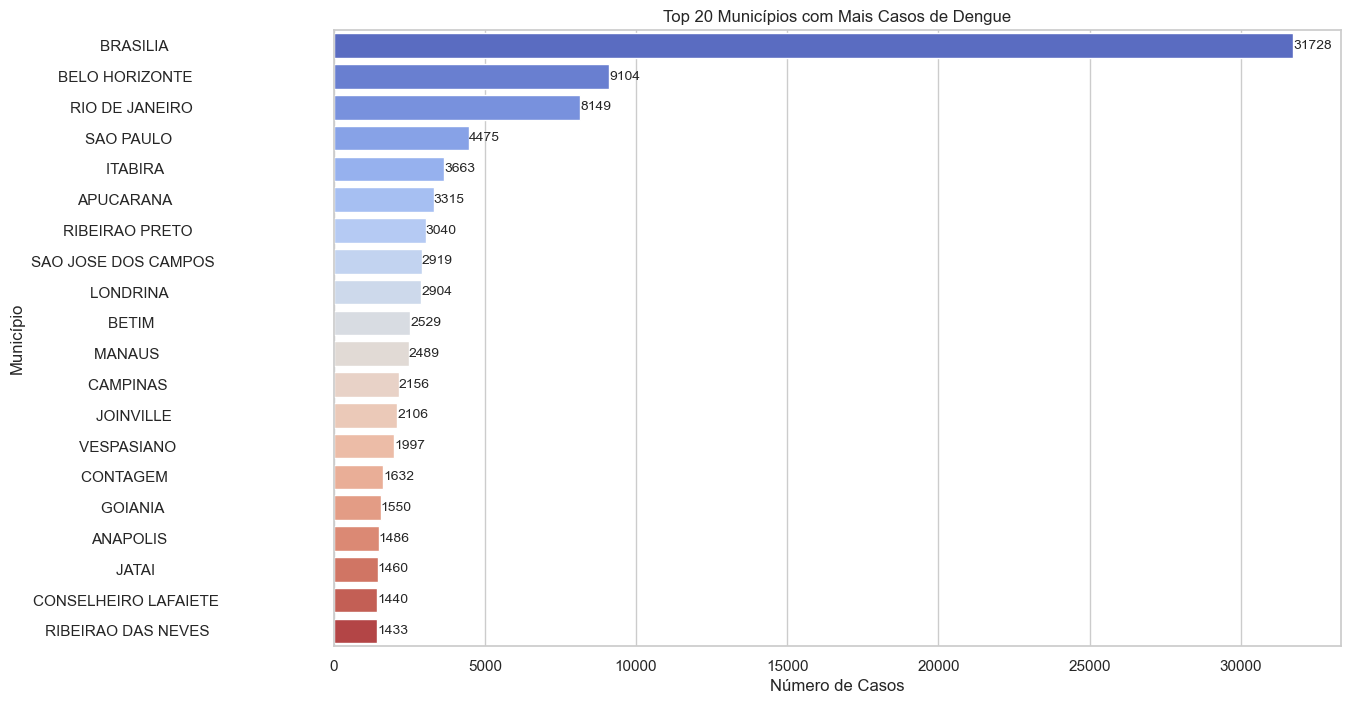

In [15]:
sns.set(style="whitegrid")

plt.figure(figsize=(13, 8))
sns.barplot(x=casos_por_municipio_top.values, y=casos_por_municipio_top.index, palette="coolwarm")

# Adiciona anotações com o número de casos em cada barra
for i, (value, name) in enumerate(zip(casos_por_municipio_top.values, casos_por_municipio_top.index)):
    plt.text(value, i, f'{value}', size=10, ha='left', va='center') 

plt.title(f'Top {top_n} Municípios com Mais Casos de Dengue')
plt.xlabel('Número de Casos')
plt.ylabel('Município')
plt.show()

Em uma análise recente sobre a dengue no Brasil, descobriu-se que a doença afeta tanto municípios com alto quanto com baixo Índice de Desenvolvimento Humano (IDH), desafiando a noção de que o desenvolvimento socioeconômico por si só pode ser um escudo contra esse tipo de problema de saúde pública. Isso ressalta a importância de estratégias de prevenção e controle adaptadas a cada realidade, demonstrando que, na luta contra a dengue, todos os municípios precisam estar igualmente preparados, independentemente de seu nível de desenvolvimento.

#### A partir do relatório de 2010, o IDH combina três dimensões:

Grau de escolaridade: média de anos de estudo da população adulta e expectativa de vida escolar, ou tempo que uma criança ficará matriculada;

Renda: Renda Nacional Bruta (RNB) per capita, baseada na paridade de poder de compra dos habitantes. Esse item tinha por base o PIB (Produto Interno Bruto) per capita, no entanto, a partir de 2010, ele foi substituído pela Renda Nacional Bruta (RNB) per capita, que avalia praticamente os mesmos aspectos que o PIB, no entanto, a RNB também considera os recursos financeiros oriundos do exterior;

Nível de saúde: baseia-se na expectativa de vida da população, reflete as condições de saúde e dos serviços de saneamento ambiental.


In [16]:
df_idhm = pd.read_excel('idhm.xlsx')

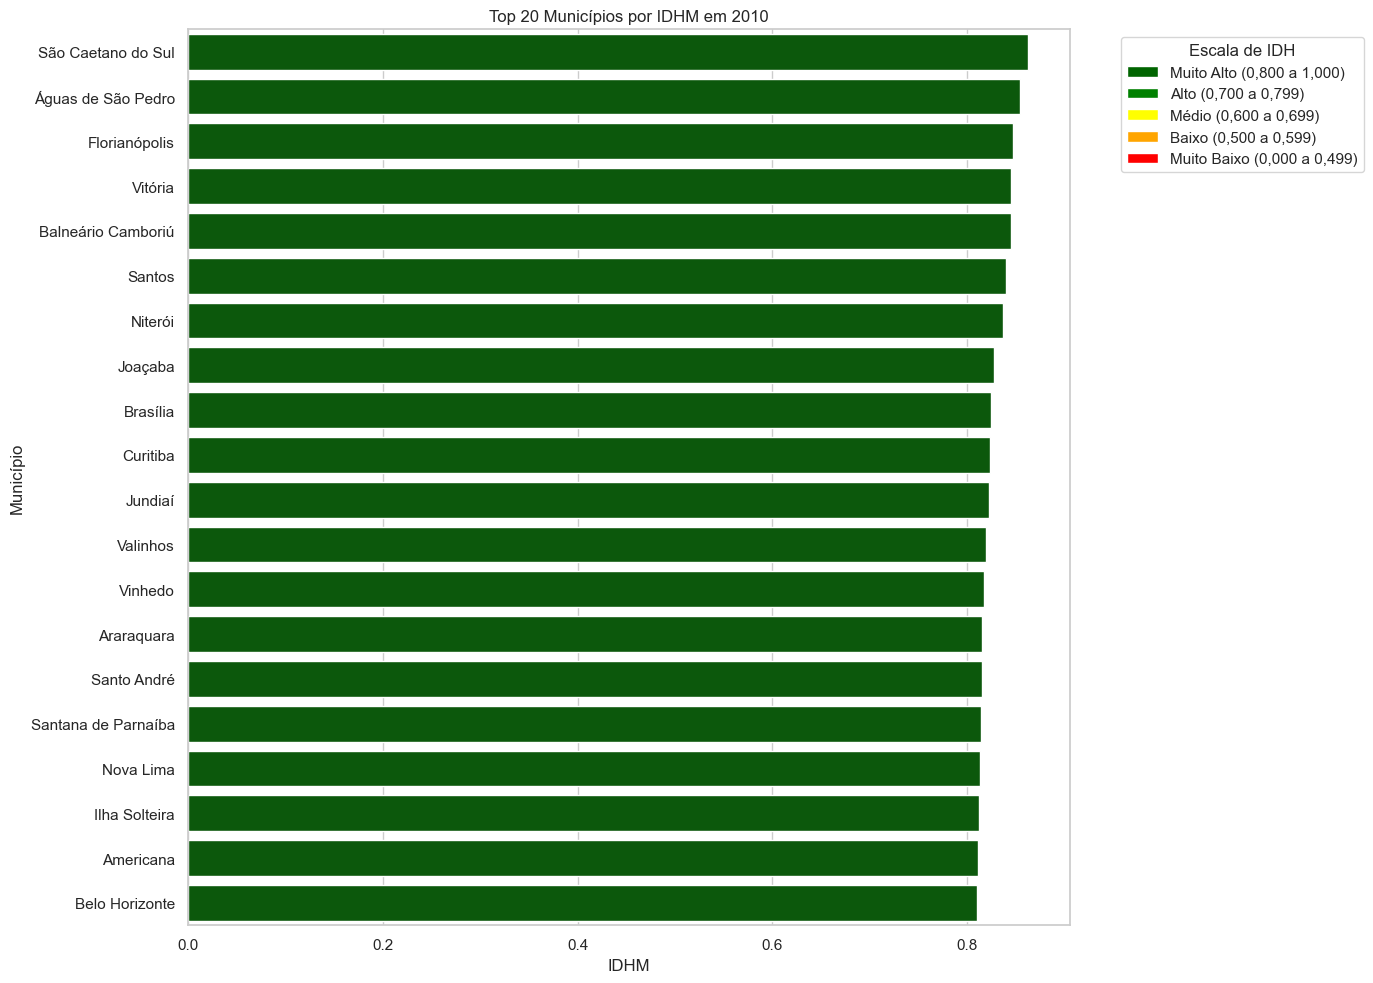

In [17]:
df_idhm_top20 = df_idhm.sort_values(by="IDHM", ascending=False).head(20)

plt.figure(figsize=(14, 10))

#Definindo cores baseadas na escala de IDH para o top 20
cores_idhm = df_idhm_top20['IDHM'].apply(
    lambda x: 'darkgreen' if x >= 0.800 else
              'green' if x >= 0.700 else
              'yellow' if x >= 0.600 else
              'orange' if x >= 0.500 else
              'red'
)

#Cria o gráfico de barras para os top 20 municípios com cores baseadas nos intervalos de IDHM
barplot = sns.barplot(x="IDHM", y="Município", data=df_idhm_top20, palette=cores_idhm)

plt.title('Top 20 Municípios por IDHM em 2010')
plt.xlabel('IDHM')
plt.ylabel('Município')

#Adiciona uma legenda para explicar as cores
from matplotlib.patches import Patch
legenda_cores = [Patch(facecolor='darkgreen', label='Muito Alto (0,800 a 1,000)'),
                 Patch(facecolor='green', label='Alto (0,700 a 0,799)'),
                 Patch(facecolor='yellow', label='Médio (0,600 a 0,699)'),
                 Patch(facecolor='orange', label='Baixo (0,500 a 0,599)'),
                 Patch(facecolor='red', label='Muito Baixo (0,000 a 0,499)')]

plt.legend(handles=legenda_cores, title='Escala de IDH', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()
plt.show()

Analisando os 20 municípios brasileiros com o maior número de casos de dengue, percebemos que a dengue é uma preocupação em diversas partes do país, afetando tanto grandes cidades como Brasília, Belo Horizonte e Rio de Janeiro, quanto municípios menores. Isso mostra que a dengue não escolhe local por seu tamanho ou importância econômica.

Ao considerar o Índice de Desenvolvimento Humano Municipal (IDHM) desses locais, fica claro que a dengue afeta áreas com diferentes níveis de desenvolvimento. Grandes centros urbanos com IDHM alto, como São Paulo, enfrentam desafios significativos com a doença, assim como cidades menores e com diferentes perfis socioeconômicos.

Isso sugere que, independentemente do IDHM, todos os municípios precisam de estratégias eficazes para combater a dengue. Fica evidente a necessidade de políticas de saúde pública abrangentes que sejam capazes de atender às especificidades de cada região, focando em prevenção, educação e infraestrutura adequada para o combate ao mosquito transmissor.

Portanto, o combate à dengue exige um esforço conjunto e adaptado às necessidades de cada município, seja ele grande ou pequeno, com alto ou baixo IDHM.

## Conclusão

A análise dos casos de dengue nos meses de dezembro de 2023 e janeiro de 2024 mostrou idéias valiosas sobre como a doença afeta diferentes partes do Brasil, sem distinção clara entre cidades mais e menos desenvolvidas. Além disso, foi observada uma leve disparidade na distribuição dos casos entre os sexos, sugerindo que fatores como atividades ao ar livre e a busca por diagnóstico e tratamento podem influenciar quem é mais afetado pela doença. Essas nuances destacam a complexidade do desafio que a dengue representa para o sistema de saúde pública, exigindo soluções que considerem as variadas dinâmicas sociais e comportamentais da população.

Portanto, fica evidente que o combate à dengue requer uma estratégia holística e adaptável, capaz de abordar tanto as necessidades específicas de cada região quanto as diferenças individuais dentro das comunidades. A cooperação entre governos, profissionais de saúde e a população é fundamental para desenvolver programas eficazes de prevenção e controle, que não apenas reduzam a incidência da dengue, mas também fortaleçam a capacidade de resposta a futuros surtos. Reconhecer e adaptar-se às diversas facetas da luta contra a dengue é crucial para proteger todas as partes da sociedade de maneira equitativa.

### DataSet

https://www.kaggle.com/datasets/jadsonrafael/notificao-de-casos-de-dengue-2024-br/data

Informações referente ao IDH foram retiradas do Wikipedia https://pt.wikipedia.org/wiki/Lista_de_munic%C3%ADpios_do_Brasil_por_IDH